<h1 align=center><font size = 5>Segmenting and Clustering Neighborhoods in Toronto, Canada</font></h1>



## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1"> Extracting neighbourhood data from Wikipedia page into a Pandas Dataframe.</a>

2. <a href="#item2"> Using the Geocoder package to extract location information (latitude & longitude). </a>

3. <a href="#item3"> Exploring Neighbourhoods using Foursquare</a>
    
4. <a href="#item3"> Clustering Neighbourhoods </a>
    
5. <a href="#item3"> Evaluation </a>
    
6. <a href="#item3"> Result Visualization </a>
    
7. <a href="#item3"> Conclusion </a>
    
    
</font>
</div>

In [1]:
!pip install bs4
from bs4 import BeautifulSoup
print("Done")

     |████████████████████████████████| 112kB 25.9MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
Done


In [2]:
!pip install lxml
!pip install html5lib


     |████████████████████████████████| 5.8MB 25.6MB/s eta 0:00:01


In [3]:
import requests
import lxml.html as lh
import pandas as pd
import numpy as np
import json # library to handle JSON files

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

print('Libraries imported.')




Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    numpy-1.18.1               |   py36h95a1406_0         5.2 MB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    scipy-1.4.1                |   py36h921218d_0        18.9 MB  conda-forge


## 1. **Extracting neighbourhood data from Wikipedia page into a Pandas Dataframe**

In [4]:
url='https://www.melbourne.vic.gov.au/about-melbourne/melbourne-profile/suburbs/Pages/suburbs.aspx'
source = requests.get(url).text
soup = BeautifulSoup(source, 'html5lib')
# soup = BeautifulSoup(source, 'lxml')
melbourne_data = pd.DataFrame(columns=['Neighbourhood'])
no=0
for h2 in soup.find_all('h2', class_="title titleindent" ) :
    try:
        suburb = h2.text
        print(suburb)
        melbourne_data.loc[no]=suburb
        no+=1        
    except AttributeError:
        pass
    
melbourne_data.shape  
 


Carlton
Docklands
East Melbourne
Kensington and Flemington
North Melbourne
Parkville
Port Melbourne
Southbank
South Yarra - west
West Melbourne
Melbourne


(11, 1)

## 2. **Use the Geocoder package to extract location information (latitude & longitude)**




In [5]:
lat_lng = pd.DataFrame(columns=['latitude','longitude'])
geolocator = Nominatim(user_agent="ny_explorer")
for i in range(10):
    address = melbourne_data['Neighbourhood'].loc[i]+', Melbourne'
    try:         
        location = geolocator.geocode(address)
        lat_lng.loc[i]=[location.latitude,location.longitude]
    except AttributeError:
        continue
df1 = melbourne_data
df2 = lat_lng
melbourne_data = pd.concat([df1, df2], axis=1)


In [6]:
melbourne_data.head(10)

,Neighbourhood,latitude,longitude
0,Carlton,-37.814218,144.963161
1,Docklands,-37.817542,144.939492
2,East Melbourne,-37.812498,144.985885
3,Kensington and Flemington,-37.789151,144.928671
4,North Melbourne,-37.807609,144.942351
5,Parkville,-37.787115,144.951553
6,Port Melbourne,NaN,NaN
7,Southbank,-37.825362,144.964020
8,South Yarra - west,NaN,NaN
9,West Melbourne,-37.810448,144.920430


In [7]:
# Remove rows that have NaN values
melbourne_data = melbourne_data.dropna()
melbourne_data = melbourne_data.reset_index(drop=True)

In [8]:
melbourne_data.head(10)

,Neighbourhood,latitude,longitude
0,Carlton,-37.814218,144.963161
1,Docklands,-37.817542,144.939492
2,East Melbourne,-37.812498,144.985885
3,Kensington and Flemington,-37.789151,144.928671
4,North Melbourne,-37.807609,144.942351
5,Parkville,-37.787115,144.951553
6,Southbank,-37.825362,144.964020
7,West Melbourne,-37.810448,144.920430


## 3. *Explore Neighbourhoods using Foursquare*

Let's get the geographical coordinates of Melbourne.

In [9]:
address = 'Melbourne, Victoria, Australia'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Melbourne are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Melbourne are -37.8142176, 144.9631608.


In [10]:
# define the world map centered around Canada with a low zoom level
melbourne_map = folium.Map(location=[latitude, longitude], zoom_start=13, tiles = 'OpenStreetMap')

# display world map
melbourne_map

In [11]:
melbourne_data

,Neighbourhood,latitude,longitude
0,Carlton,-37.814218,144.963161
1,Docklands,-37.817542,144.939492
2,East Melbourne,-37.812498,144.985885
3,Kensington and Flemington,-37.789151,144.928671
4,North Melbourne,-37.807609,144.942351
5,Parkville,-37.787115,144.951553
6,Southbank,-37.825362,144.964020
7,West Melbourne,-37.810448,144.920430


Create map of Melbourne with the Neighborhoods marked

In [12]:
map_melbourne = folium.Map(location=[latitude, longitude], zoom_start=13, tiles = 'OpenStreetMap')

# add markers to map
for lat, lng, label in zip(melbourne_data['latitude'], melbourne_data['longitude'], melbourne_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_melbourne)  
    
map_melbourne

##### Define Foursquare Credentials and Version

In [13]:
CLIENT_ID = 'WPAN32M423EK3YBOUCSJLYFGCNUXVKL2AHRMRMZY5AJBMT1E' # your Foursquare ID
CLIENT_SECRET = 'VKOXRZZGL5YPST5MVQSMRM0NUADOE5V3VLZ5L3COWKZBZNCV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WPAN32M423EK3YBOUCSJLYFGCNUXVKL2AHRMRMZY5AJBMT1E
CLIENT_SECRET:VKOXRZZGL5YPST5MVQSMRM0NUADOE5V3VLZ5L3COWKZBZNCV


Get the FIRST neighbourhood's latitude and longitude values.

In [14]:
neighbourhood_latitude = melbourne_data.loc[0, 'latitude'] # neighborhood latitude value
neighbourhood_longitude = melbourne_data.loc[0, 'longitude'] # neighborhood longitude value

neighbourhood_name = melbourne_data.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of Carlton are -37.8142176, 144.9631608.


##### Now, let's get the top 200 venues of the first neighbourhood within a radius of 500 meters.

In [15]:
LIMIT = 200 # limit of number of venues returned by Foursquare API

radius = 500 # define radius


# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbourhood_latitude, 
    neighbourhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=WPAN32M423EK3YBOUCSJLYFGCNUXVKL2AHRMRMZY5AJBMT1E&client_secret=VKOXRZZGL5YPST5MVQSMRM0NUADOE5V3VLZ5L3COWKZBZNCV&v=20180605&ll=-37.8142176,144.9631608&radius=500&limit=200'

Send the GET request and examine the resutls

In [16]:
results = requests.get(url).json()
#results

We know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [17]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [18]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Tipo 00,Italian Restaurant,-37.813527,144.961978
1,Brother Baba Budan,Coffee Shop,-37.813445,144.962137
2,Kirk's Wine Bar,Wine Bar,-37.813661,144.961351
3,B'cos Brazil,Brazilian Restaurant,-37.815486,144.963085
4,Nosh,Asian Restaurant,-37.815396,144.962999


Let's visualize the neighbourhoods in Toronto 

Start utilizing the Foursquare API to explore the neighbourhoods and segment them

#### Let's get the details to all the neighbourhoods in Melbourne

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Run the above function for each neighborhood and create a new dataframe called *Melbourne_venues*.

In [20]:
melbourne_venues = getNearbyVenues(names=melbourne_data['Neighbourhood'],
                                 latitudes=melbourne_data['latitude'],
                                 longitudes=melbourne_data['longitude']
                                  )


Carlton
Docklands
East Melbourne
Kensington and Flemington
North Melbourne
Parkville
Southbank
West Melbourne


#### Check the size of the resulting dataframe

In [21]:
print(melbourne_venues.shape)
melbourne_venues.head()

(291, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Carlton,-37.814218,144.963161,Tipo 00,-37.813527,144.961978,Italian Restaurant
1,Carlton,-37.814218,144.963161,Brother Baba Budan,-37.813445,144.962137,Coffee Shop
2,Carlton,-37.814218,144.963161,Kirk's Wine Bar,-37.813661,144.961351,Wine Bar
3,Carlton,-37.814218,144.963161,B'cos Brazil,-37.815486,144.963085,Brazilian Restaurant
4,Carlton,-37.814218,144.963161,Nosh,-37.815396,144.962999,Asian Restaurant


In [22]:
## Venues categories before filtering
print('There are {} uniques categories.'.format(len(melbourne_venues['Venue Category'].unique())))
print('There are {} uniques categories.'.format(melbourne_venues['Venue Category'].unique()))

There are 107 uniques categories.
There are ['Italian Restaurant' 'Coffee Shop' 'Wine Bar' 'Brazilian Restaurant'
 'Asian Restaurant' 'Japanese Restaurant' 'Cocktail Bar' 'Dessert Shop'
 'Bar' 'Café' 'Comic Shop' 'Shopping Mall' 'Thai Restaurant'
 'Toy / Game Store' 'Art Gallery' 'Pizza Place' 'Tea Room' 'Boutique'
 'Indonesian Restaurant' 'Sushi Restaurant' 'Gourmet Shop' 'Candy Store'
 'Cosmetics Shop' 'Theater' 'Clothing Store' 'Shopping Plaza'
 'Movie Theater' 'Spanish Restaurant' 'Dim Sum Restaurant' 'Burger Joint'
 'Miscellaneous Shop' 'Juice Bar' 'Beer Garden' 'Argentinian Restaurant'
 'Mexican Restaurant' 'Chinese Restaurant' 'Performing Arts Venue'
 'Chocolate Shop' 'Jewelry Store' 'General Entertainment'
 'Gluten-free Restaurant' 'Dumpling Restaurant' 'Scandinavian Restaurant'
 'Bookstore' 'Food Court' 'Donut Shop' 'Road' 'Restaurant'
 'Tapas Restaurant' 'Pharmacy' 'Szechuan Restaurant' 'Korean Restaurant'
 'Ramen Restaurant' 'Whisky Bar' 'Creperie' 'Middle Eastern Restaurant

#### Filter out the venue locations that we are looking for 

In [23]:
searchvenues='Grocery|Market|Supermarket|Store|Tram|Harbor|Marina|Art|Vegan|Vegetarian|Bakery|Wine|Shop|Book|Rental|Share|Bus|Travel|Transport|Train|Rail|Taxi|Airport|Health|Hospital|Medical|Park|Garden|Walk'

melbourne_venues = melbourne_venues[melbourne_venues['Venue Category'].str.contains(searchvenues)].reset_index(drop=True)
melbourne_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Carlton,-37.814218,144.963161,Brother Baba Budan,-37.813445,144.962137,Coffee Shop
1,Carlton,-37.814218,144.963161,Kirk's Wine Bar,-37.813661,144.961351,Wine Bar
2,Carlton,-37.814218,144.963161,La Belle Miette,-37.813979,144.961429,Dessert Shop
3,Carlton,-37.814218,144.963161,Minotaur,-37.815406,144.963603,Comic Shop
4,Carlton,-37.814218,144.963161,The Block Arcade,-37.815571,144.964402,Shopping Mall


In [24]:
# Drop rows from melbourne_data that are not in melbourne_venues
melbourne_data = melbourne_data[melbourne_data.Neighbourhood.isin(melbourne_venues.Neighbourhood)].reset_index(drop=True)
melbourne_data.shape


(7, 3)

#### Let's check how many venues were returned for each neighborhood

In [25]:
melbourne_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Carlton,39,39,39,39,39,39
Docklands,15,15,15,15,15,15
East Melbourne,11,11,11,11,11,11
Kensington and Flemington,6,6,6,6,6,6
Parkville,2,2,2,2,2,2
Southbank,16,16,16,16,16,16
West Melbourne,2,2,2,2,2,2


#### Let's check if we have extracted only the chosen venue categories 

In [26]:
print('There are {} uniques categories.'.format(len(melbourne_venues['Venue Category'].unique())))
print('There are {} uniques categories.'.format(melbourne_venues['Venue Category'].unique()))

There are 37 uniques categories.
There are ['Coffee Shop' 'Wine Bar' 'Dessert Shop' 'Comic Shop' 'Shopping Mall'
 'Toy / Game Store' 'Art Gallery' 'Gourmet Shop' 'Candy Store'
 'Cosmetics Shop' 'Clothing Store' 'Shopping Plaza' 'Miscellaneous Shop'
 'Beer Garden' 'Performing Arts Venue' 'Chocolate Shop' 'Jewelry Store'
 'Bookstore' 'Donut Shop' 'Bakery' 'Ice Cream Shop' 'Park'
 'Fish & Chips Shop' 'Grocery Store' 'Flea Market'
 'Furniture / Home Store' 'Tram Station' "Men's Store"
 'Light Rail Station' 'Harbor / Marina' 'Convenience Store'
 'Train Station' 'Wine Shop' 'Sculpture Garden' 'Supermarket' 'Pet Store'
 'Vegetarian / Vegan Restaurant'] uniques categories.


#### Let's analyze each neighbourhood

In [27]:
# one hot encoding
melbourne_onehot = pd.get_dummies(melbourne_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
melbourne_onehot['Neighbourhood'] = melbourne_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [melbourne_onehot.columns[-1]] + list(melbourne_onehot.columns[:-1])
melbourne_onehot = melbourne_onehot[fixed_columns]

melbourne_onehot.head()

,Neighbourhood,Art Gallery,Bakery,Beer Garden,Bookstore,Candy Store,Chocolate Shop,Clothing Store,Coffee Shop,Comic Shop,...,Sculpture Garden,Shopping Mall,Shopping Plaza,Supermarket,Toy / Game Store,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop
0,Carlton,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Carlton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Carlton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Carlton,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Carlton,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [28]:
melbourne_onehot.shape

(91, 38)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [29]:
melbourne_grouped = melbourne_onehot.groupby('Neighbourhood').mean().reset_index()
melbourne_grouped

,Neighbourhood,Art Gallery,Bakery,Beer Garden,Bookstore,Candy Store,Chocolate Shop,Clothing Store,Coffee Shop,Comic Shop,...,Sculpture Garden,Shopping Mall,Shopping Plaza,Supermarket,Toy / Game Store,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop
0,Carlton,0.025641,0.000000,0.025641,0.051282,0.051282,0.051282,0.076923,0.230769,0.051282,...,0.000000,0.076923,0.025641,0.000000,0.051282,0.000000,0.000000,0.0000,0.025641,0.000000
1,Docklands,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.066667,0.133333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.0000,0.000000,0.000000
2,East Melbourne,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.0000,0.181818,0.090909
3,Kensington and Flemington,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,...,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
4,Parkville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
5,Southbank,0.062500,0.125000,0.000000,0.000000,0.000000,0.000000,0.062500,0.125000,0.000000,...,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.0625,0.000000,0.000000
6,West Melbourne,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000


In [30]:
melbourne_grouped.shape

(7, 38)

#### Let's put the most common  into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [32]:


import numpy as np
num_top_venues = 7

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = melbourne_grouped['Neighbourhood']

for ind in np.arange(melbourne_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(melbourne_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Carlton,Coffee Shop,Dessert Shop,Shopping Mall,Clothing Store,Comic Shop,Bookstore,Toy / Game Store
1,Docklands,Coffee Shop,Harbor / Marina,Furniture / Home Store,Grocery Store,Ice Cream Shop,Light Rail Station,Men's Store
2,East Melbourne,Sculpture Garden,Wine Bar,Wine Shop,Grocery Store,Fish & Chips Shop,Convenience Store,Park
3,Kensington and Flemington,Grocery Store,Bakery,Supermarket,Light Rail Station,Coffee Shop,Dessert Shop,Cosmetics Shop
4,Parkville,Sculpture Garden,Park,Comic Shop,Flea Market,Fish & Chips Shop,Donut Shop,Dessert Shop


## *4. Cluster Neighbourhoods* 

## K-Means Clustering

#### We run K-Means for different values of K 

In [33]:

# set number of clusters
kclusters = 5

melbourne_grouped_clustering = melbourne_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(melbourne_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 4, 1, 0, 1, 2], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [34]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

melbourne_merged = melbourne_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
melbourne_merged = melbourne_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

melbourne_merged.head() # check the last columns!

,Neighbourhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Carlton,-37.814218,144.963161,3,Coffee Shop,Dessert Shop,Shopping Mall,Clothing Store,Comic Shop,Bookstore,Toy / Game Store
1,Docklands,-37.817542,144.939492,3,Coffee Shop,Harbor / Marina,Furniture / Home Store,Grocery Store,Ice Cream Shop,Light Rail Station,Men's Store
2,East Melbourne,-37.812498,144.985885,4,Sculpture Garden,Wine Bar,Wine Shop,Grocery Store,Fish & Chips Shop,Convenience Store,Park
3,Kensington and Flemington,-37.789151,144.928671,1,Grocery Store,Bakery,Supermarket,Light Rail Station,Coffee Shop,Dessert Shop,Cosmetics Shop
4,Parkville,-37.787115,144.951553,0,Sculpture Garden,Park,Comic Shop,Flea Market,Fish & Chips Shop,Donut Shop,Dessert Shop


## Evaluation

#### We need to know the best value of K for clustering. We shall use the **ELBOW METHOD** for this:

Text(0, 0.5, 'Sum of squared distance')

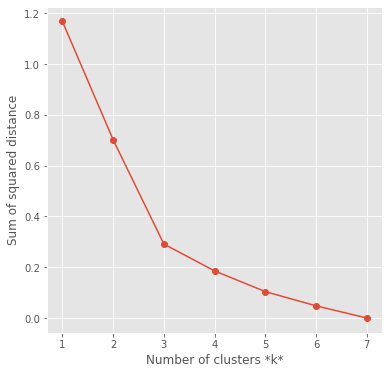

In [49]:
import matplotlib.pyplot as plt
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 8))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(melbourne_grouped_clustering)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

### K = 5 was the value used 

## Results 

#### Lets see which neighborhood is in the same cluster as 'Docklands'

In [36]:
melbourne_merged.loc[melbourne_merged['Cluster Labels'] == 3, melbourne_merged.columns[[0] + list(range(4, melbourne_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Carlton,Coffee Shop,Dessert Shop,Shopping Mall,Clothing Store,Comic Shop,Bookstore,Toy / Game Store
1,Docklands,Coffee Shop,Harbor / Marina,Furniture / Home Store,Grocery Store,Ice Cream Shop,Light Rail Station,Men's Store


## Result Visualization

#### The neighbourhood that is similar to Docklands (marked in red)

In [37]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12, tiles = 'OpenStreetMap')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(melbourne_merged['latitude'], melbourne_merged['longitude'], melbourne_merged['Neighbourhood'], melbourne_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-4],
        fill=True,
        fill_color=rainbow[cluster-4],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Since Carlton is our selected neighbourhood, let's visualize its venues

In [38]:
melbourne_bar = melbourne_grouped
melbourne_bar.head()


,Neighbourhood,Art Gallery,Bakery,Beer Garden,Bookstore,Candy Store,Chocolate Shop,Clothing Store,Coffee Shop,Comic Shop,...,Sculpture Garden,Shopping Mall,Shopping Plaza,Supermarket,Toy / Game Store,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop
0,Carlton,0.025641,0.000000,0.025641,0.051282,0.051282,0.051282,0.076923,0.230769,0.051282,...,0.000000,0.076923,0.025641,0.000000,0.051282,0.000000,0.000000,0.0,0.025641,0.000000
1,Docklands,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.066667,0.133333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.0,0.000000,0.000000
2,East Melbourne,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.0,0.181818,0.090909
3,Kensington and Flemington,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,...,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,Parkville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [39]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in melbourne_bar.columns)

True

In [40]:
# Set Neighborhood to index
melbourne_bar.set_index('Neighbourhood', inplace=True)


In [41]:
# Let's create a list of venue categories. 
# this will come in handy when we start plotting the data
Venue_Cats = ['Coffee Shop','Wine Bar','Dessert Shop','Comic Shop','Shopping Mall', 'Toy / Game Store', 'Art Gallery', 'Candy Store', 'Gourmet Shop', 'Cosmetics Shop', 'Clothing Store', 'Shopping Plaza', 'Miscellaneous Shop','Beer Garden', 'Performing Arts Venue', 'Chocolate Shop', 'Jewelry Store', 'Bookstore', 'Donut Shop']
 

In [42]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style


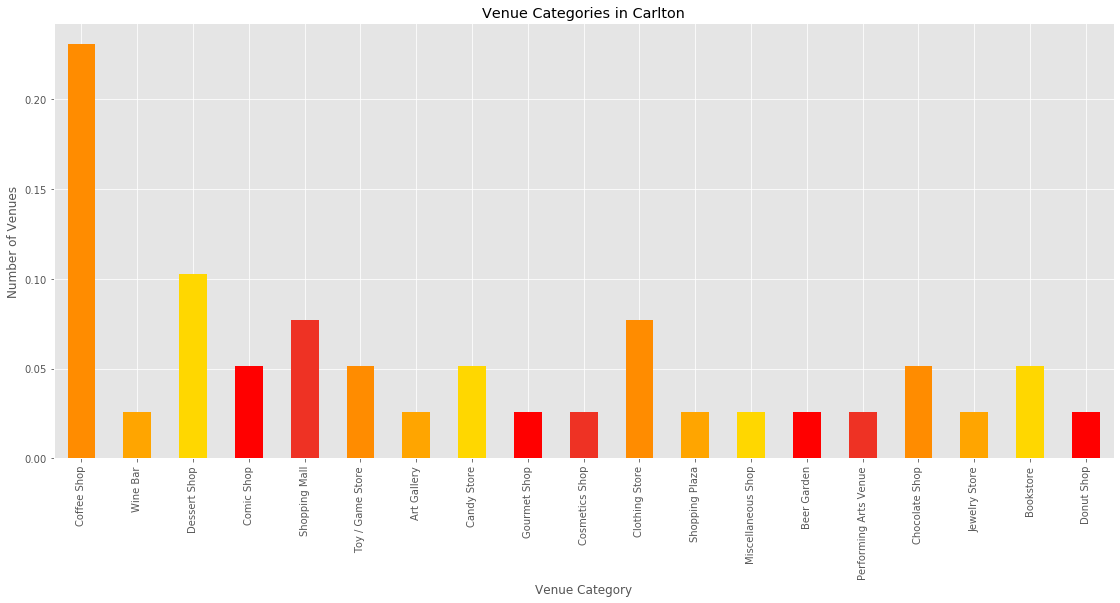

In [43]:
# plot the bar chart
# step 1: get the data
df_carlton = melbourne_bar.loc['Carlton', Venue_Cats]

# step 2: plot data
#df_carlton.plot(kind='bar', figsize=(19, 8), color=[ '#EE3224', '#bc5090', '#F78F1E'], edgecolor='blue')
df_carlton.plot(kind='bar', figsize=(19, 8), color=[ 'darkorange', 'orange', 'gold', 'red', '#EE3224'], edgecolor='none')
plt.xlabel('Venue Category') # add to x-label to the plot
plt.ylabel('Number of Venues') # add y-label to the plot
plt.title('Venue Categories in Carlton') # add title to the plot

plt.show()


#### Carlton is the neighborhood that is most similar to Docklands. Let's make sure Carlton is the neighborhood that 
#### meets Mrs. Smith's requirements *most* in terms of preferred Venues.¶

#### Let's visualize this by using a WordCloud

In [44]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge

The following NEW packages will be INSTALLED:

    wordcloud: 1.4.1-py36_0 conda-forge


wordcloud-1.4.1      | 324 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Wordcloud is installed and imported!


In [45]:
df_wordcloud = melbourne_venues.groupby('Neighbourhood').count()
df_wordcloud.drop(['Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Latitude', 'Venue Longitude', 'Venue Category'], axis=1, inplace=True)
# Total number of all venues for all Neighborhoods
total_venues = df_wordcloud['Venue'].sum()


In [46]:
#Using these single-word names, let's duplicate each neighbourhood's name based on how much they contribute 

max_words = 90
word_string = ''
for Neighbourhood in df_wordcloud.index.values:
    # check if country's name is a single-word name
    #if len(Neighbourhood.split(' ')) == 1:
    repeat_num_times = int(df_wordcloud.loc[Neighbourhood, 'Venue']/float(total_venues)*max_words)
    word_string = word_string + ((Neighbourhood + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Carlton Docklands Docklands Docklands Docklands Docklands Docklands Docklands Docklands Docklands Docklands Docklands Docklands Docklands Docklands East Melbourne East Melbourne East Melbourne East Melbourne East Melbourne East Melbourne East Melbourne East Melbourne East Melbourne East Melbourne Kensington and Flemington Kensington and Flemington Kensington and Flemington Kensington and Flemington Kensington and Flemington Parkville Southbank Southbank Southbank Southbank Southbank Southbank Southbank Southbank Southbank Southbank Southbank Southbank Southbank Southbank Southbank West Melbourne '

Word cloud created!


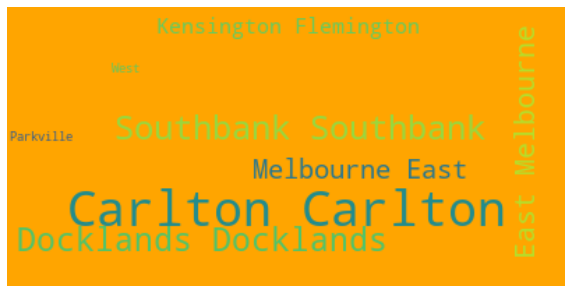

In [48]:
# create the word cloud
wordcloud = WordCloud(background_color='orange').generate(word_string)

print('Word cloud created!')

# display the cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(16)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### The WordCloud shows that Carlton meets Mrs.Smith's requirements even more than her current neighborhood, Docklands.

## **Conclusion**

#### Our aim was to find a Suburb (Neighbourhood) that is very similar to **Docklands**. 
####  Using K-means we found that **Carlton** is the one!
##### But we could not locate some required venues like Car rental, Bus station, Hospital in Carlton as the data was not available on Foursquare

